# **Analise dos preços das casas no Canadá para as principais cidades**
https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities


**Objetivo:** Por meio da análise exploratória de dados (EDA), tirar conclusões sobre os
preços das casas no Canadá para as principais cidades, fazendo testes
estatisticos e preditivos.

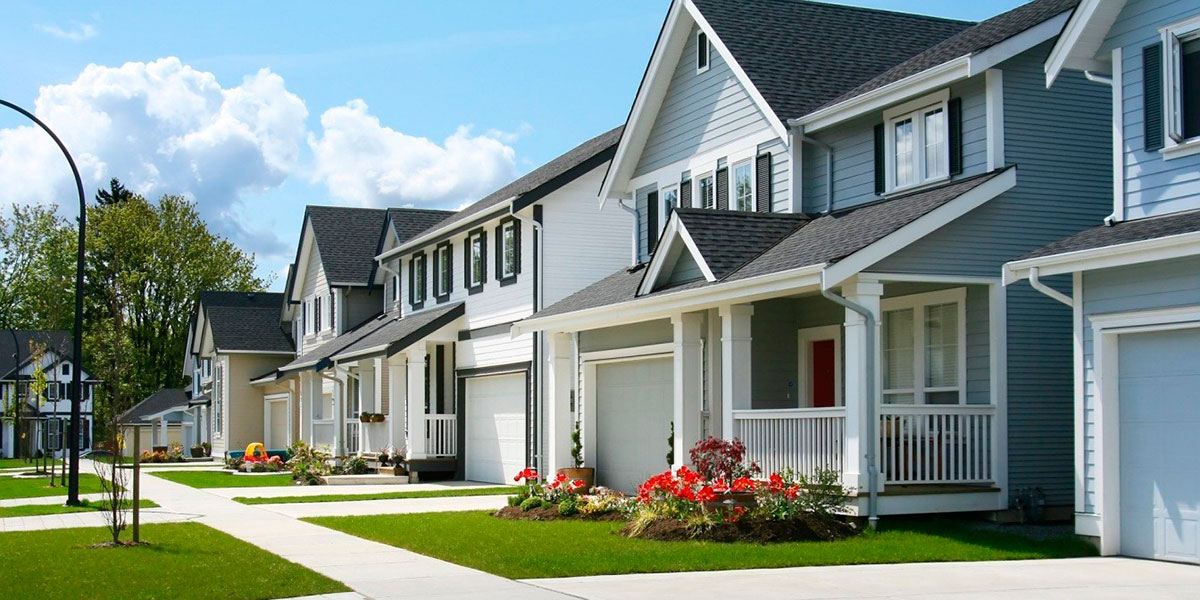

Importações das bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Importação do banco de dados

In [ ]:
Imoveis_Canada = pd.read_csv('https://raw.githubusercontent.com/Sharmaprateek01/Canadian-House-Prices-for-Top-Cities/main/02%20Data/Original%20Data/Housing%20price.csv')

Visualizar os 5 primeiros valores desse banco de dados

In [ ]:
Imoveis_Canada.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900,318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000
1,Toronto,799999,818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000
2,Toronto,799900,714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000
3,Toronto,1200000,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000
4,Toronto,668800,420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000


Ler as informações das variáveis de cada coluna:

*   Não há celulas vazias em nenhuma coluna
*   Há 3 tipos: valores inteiros, flutuantes e objeto
*   Possui ao todo 10 colunas
*   35768 Linhas


In [ ]:
Imoveis_Canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  int64  
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 2.7+ MB


Ver quais são as cidades do Canadá que foram avaliadas.

In [ ]:
Imoveis_Canada['City'].unique()

array(['Toronto', 'Vancouver', 'Calgary', 'Edmonton', 'Ottawa',
       'Winnipeg', 'Hamilton', 'Kitchener', 'London', 'St. Catharines',
       'Oshawa', 'Victoria', 'Windsor', 'Saskatoon', 'Regina',
       "St. John's", 'Barrie', 'Kelowna', 'Abbotsford', 'Sudbury',
       'Kingston', 'Guelph', 'Moncton', 'Brantford', 'Thunder Bay',
       'Saint John', 'Peterborough', 'Red Deer', 'Kamloops', 'Nanaimo',
       'Lethbridge', 'White Rock', 'Maple Ridge', 'Prince George',
       'Sault Ste. Marie', 'Medicine Hat', 'New Westminster', 'Caledon',
       'Burnaby', 'Airdrie', 'Montreal', 'Sherbrooke', 'Quebec',
       'Trois-Rivieres', 'Halifax'], dtype=object)

Ver quais são as provinças do Canadá que foram avaliadas.

In [ ]:
Imoveis_Canada['Province'].unique()

array(['Ontario', 'British Columbia', 'Alberta', 'Manitoba',
       'Saskatchewan', 'Newfoundland and Labrador', 'New Brunswick',
       'Quebec', 'Nova Scotia'], dtype=object)

Traduzir os nomes das colunas

In [ ]:
Imoveis_Canada.columns = ['Cidade','Preço','Endereço','Número de Quartos','Número de Banheiros','Provinça','População','Latitude','Longitude','Renda Familiar Média']
Imoveis_Canada.head(0)

,Cidade,Preço,Endereço,Número de Quartos,Número de Banheiros,Provinça,População,Latitude,Longitude,Renda Familiar Média


O preço médio das casas em Toronto é $1.235.288,77 Dolar Canadense

In [ ]:
Imoveis_Canada.query('Cidade == "Toronto"')['Preço'].mean()

1235288.7735109718

Com base na analise gráfico boxplot:  

*   a média da Renda Familiar é próximo de $90.000,00 Dolar Canadense.

*   Além disso, os valores, em 75% dos casos, estão entre um pouco acima de 80.000,00 e um pouco abaixo de 100.000,00 Dolar Canadense.

*   A Ultima analise são os outliers, onde tem um valor que foge do padrão que seria próximo dos 130.000,00 Dolar Canadense.

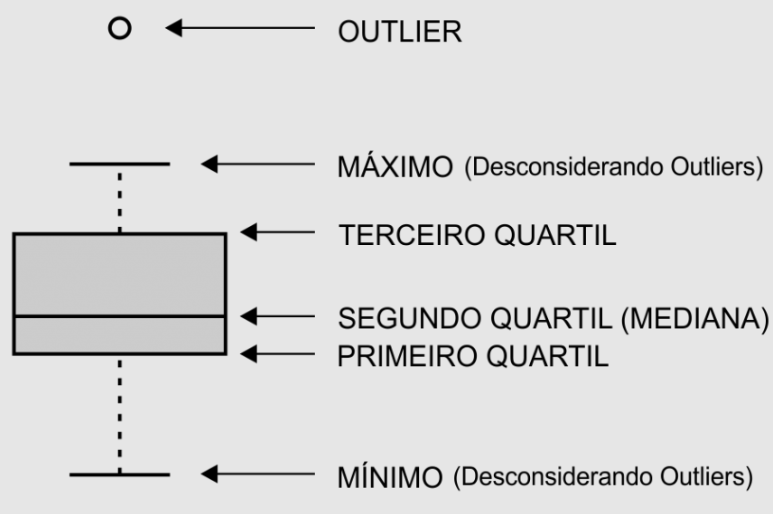


<Axes: ylabel='Renda Familiar Média'>

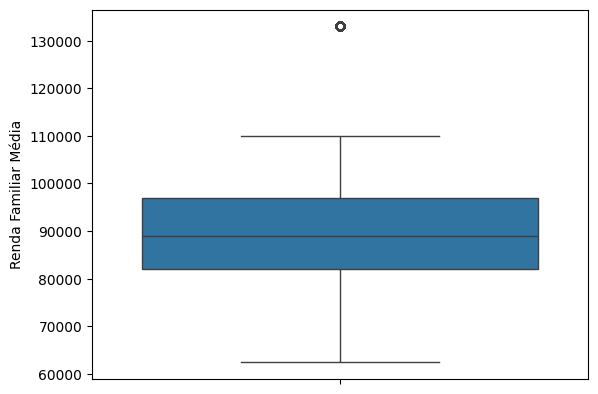

In [ ]:
sns.boxplot(Imoveis_Canada["Renda Familiar Média"])

Outra maneira de descobrir tais dados, é por meio do describe()

In [ ]:
Imoveis_Canada['Renda Familiar Média'].describe()

,Renda Familiar Média
count,35768.000000
mean,89643.103416
std,12132.353510
min,62400.000000
25%,82000.000000
50%,89000.000000
75%,97000.000000
max,133000.000000


As cidades com o custo médio de imovel mais caro:

*   White Rock
*   Vancouver
*   Maple Ridge
*   Caledon
*   Abbotsford



In [ ]:
media_imoveis_por_cidade = Imoveis_Canada.groupby('Cidade')['Preço'].mean().round(2)
media_imoveis_por_cidade.sort_values(ascending=False).head()

,Preço
Cidade,
White Rock,2220779.64
Vancouver,1851758.69
Maple Ridge,1497012.49
Caledon,1383365.90
Abbotsford,1337250.60


Criar um banco de dados sem as colunas "Cidade", "Endereço" e "Provinça"
* é necessario essa remoção, pois como são dados string (textos) impossibilita realizar as correlaçoes entre os dados.

In [ ]:
Imoveis_Canada_limpo = Imoveis_Canada.drop(columns=['Cidade', 'Endereço', 'Provinça'],axis=1)
Imoveis_Canada_limpo.head()

,Preço,Número de Quartos,Número de Banheiros,População,Latitude,Longitude,Renda Familiar Média
0,779900,3,2,5647656,43.7417,-79.3733,97000
1,799999,3,1,5647656,43.7417,-79.3733,97000
2,799900,2,2,5647656,43.7417,-79.3733,97000
3,1200000,4,2,5647656,43.7417,-79.3733,97000
4,668800,1,1,5647656,43.7417,-79.3733,97000


Fazer um mapa de calor para ver a correlação entre cada coluna do banco de dados

Os valores variam de -1 a +1

*   Correlação proximo de 0 = Inexistencia de relação entre os dados
*   Correlação proxima de +1 = Dados são diretamente proporcionais
*   Correlação proximo de -1 = Dados são inversamente proporcionais

Pela analise gráfica e pela tabela das correlaçoes em relação ao preço podemos concluir que:

*   População, Latitude, Longitude, Renda Familiar Média pouco influencia no valor do imovél
*   Número de quartos e banheiros influenciam diretamente no preço dos imoveis, sendo que o número de banheiro é o fator que mais influência.

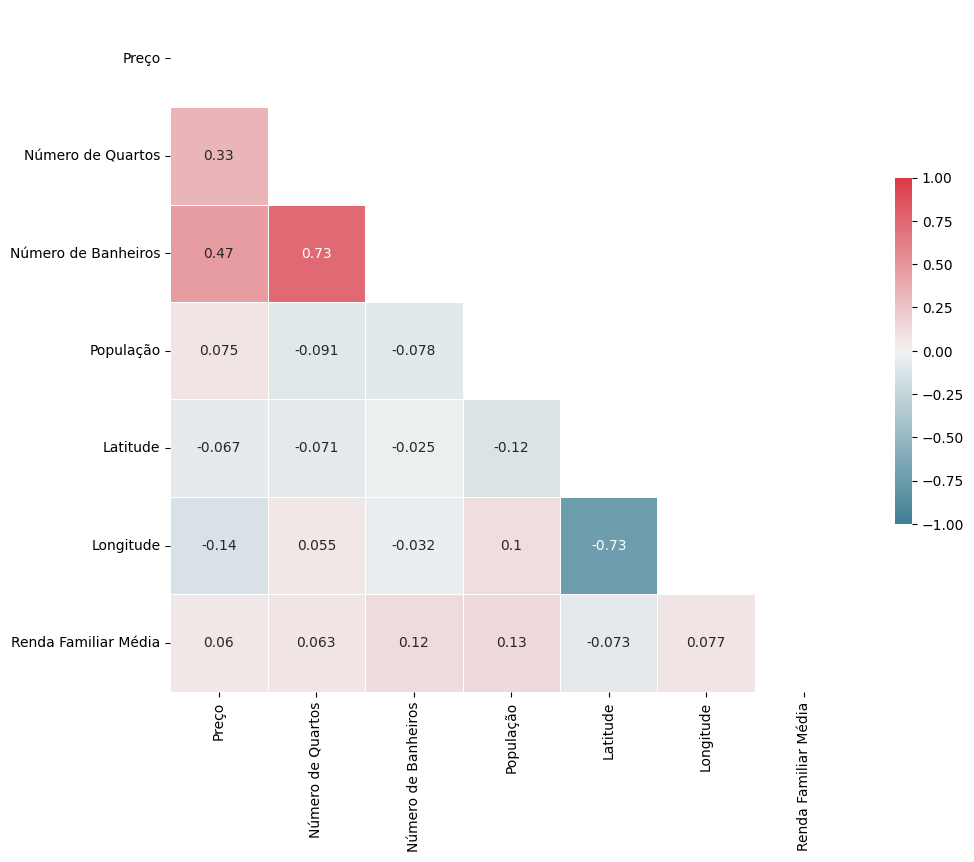

Preço                   1.000000
Número de Quartos       0.329956
Número de Banheiros     0.466821
População               0.074892
Latitude               -0.066704
Longitude              -0.138830
Renda Familiar Média    0.059795
Name: Preço, dtype: float64


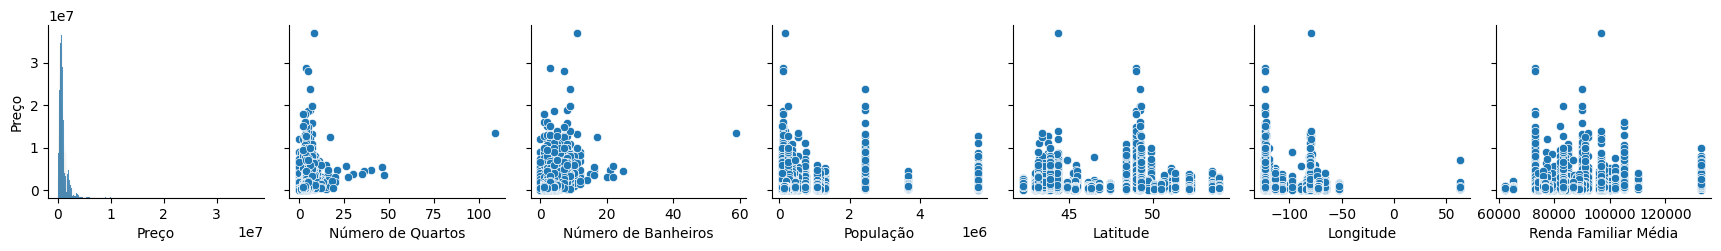

In [ ]:
corr = Imoveis_Canada_limpo.corr()

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

correlacao = Imoveis_Canada_limpo.corr()
print(correlacao['Preço'])

sns.pairplot(Imoveis_Canada_limpo, y_vars="Preço")

Dividir nosso conjunto de dados em duas partes: treino e teste

*   y = Preço dos Imoveis
*   x = todos os dados com excessão da coluna Preço.

Utilizou-se:

*   30% dos dados para teste
*   70% dos dados para treino


In [ ]:
from sklearn.model_selection import train_test_split
y = Imoveis_Canada_limpo['Preço']
x = Imoveis_Canada_limpo.drop(columns='Preço',)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)

Criação de 3 modelos para a regressão linear:



*   Criação de uma constante, ela é importante para ajustar o modelo de maneira adequada;
*   Modelo_1: é um modelo saturado, com todas as variaveis;
*   Modelo_2: Modelo sem latitude e longitude;
*   Modelo_3: Modelo sem latitude, longitude, Renda familíar média e População.





In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
modelo_1 = sm.OLS(y_train, x_train).fit()
modelo_2 = sm.OLS(y_train,
                  x_train[['const', 'Número de Quartos', 'Número de Banheiros',
                          'População','Renda Familiar Média']]).fit()
modelo_3 = sm.OLS(y_train,
                  x_train[['const', 'Número de Quartos', 'Número de Banheiros']]).fit()

Fazer a analise dos modelos.

*   Modelo_1 e modelo_2 mostrou uma mensagem que indica uma multicolinearidade, isto é, existem alguns efeitos que não estão conseguindo isolar a explicação do preço da casa e estão sendo confundidos. Sendo um indício ruim de um modelo.

"The condition number is large, 2.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems."

"The condition number is large, 9.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems."


In [ ]:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preço   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     1616.
Date:                Fri, 23 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:50:59   Log-Likelihood:            -3.7813e+05
No. Observations:               25037   AIC:                         7.563e+05
Df Residuals:                   25030   BIC:                         7.563e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.852e+06 

In [ ]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preço   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     1782.
Date:                Fri, 23 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:50:59   Log-Likelihood:            -3.7909e+05
No. Observations:               25037   AIC:                         7.582e+05
Df Residuals:                   25032   BIC:                         7.582e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.721e+04 

In [ ]:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preço   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     3314.
Date:                Fri, 23 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:50:59   Log-Likelihood:            -3.7929e+05
No. Observations:               25037   AIC:                         7.586e+05
Df Residuals:                   25034   BIC:                         7.586e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.703e+04   1

Ver o valor do R², que é um modelo de ajuste do modelo de regressão linear, em resumo é, fornece uma indicação de quão bem o modelo se ajusta aos dados.

*   0: O modelo não explica nenhuma da variabilidade dos dados
*   1: O modelo explica toda a variabilidade dos dados.
*   Entre 0 e 1: Um valor mais próximo de 1 indica um melhor ajuste do modelo. Um valor mais próximo de 0 indica um ajuste ruim.

Dessa maneira:

*   Modelo 1 explica 27,92% da variabilidade dos dados
*   Modelo 2 explica 22,15% da variabilidade dos dados
*   Modelo 3 explica 20,93% da variabilidade dos dados

Por mais que o modelo 3 apresente menor valor, ele é mais viavel sua utilização pois, não a indicação de multicolinearidade.

Observação: Todos os modelos possuem valor baixo de R², mostrando que é um ajuste relativamente modesto, indicando que há uma quantidade significativa de variabilidade que não está sendo explicada pelo modelo.






In [ ]:
print("R²")
print('Modelo_1: ', modelo_1.rsquared)
print('Modelo_2: ', modelo_2.rsquared)
print('Modelo_3: ', modelo_3.rsquared)

R²
Modelo_1:  0.2792034954102276
Modelo_2:  0.22159855956514363
Modelo_3:  0.20932884260258344


Analisar os parametros do modelo 3

*   A constante (Valor independente - intercepto) é igual a 97027;
*   Além disso, variando somente o "Número de Banheiros", e mantendo os outros dados constantes, a cada quarto que aumenta, o valor do ímovel aumenta em $360.031.

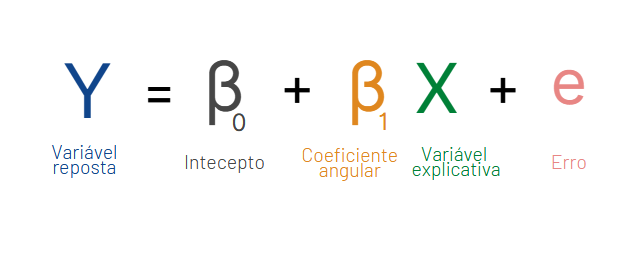



In [ ]:
modelo_3.params

,0
const,97027.149148
Número de Quartos,-20439.903426
Número de Banheiros,360031.881724


Comparativo entre o R² do treino e do teste


*   r² treino = 20.93%
*   r² teste = 24,07%

Os resultados mostram que o modelo tem uma capacidade limitada de explicar a variação nos dados, com ambos os valores sendo relativamente baixos.
A diferença entre eles sugere que o modelo pode estar se adaptando um pouco melhor aos dados de teste em comparação com os dados de previsão (treino), embora a melhoria seja modesta.


In [ ]:
x_test = sm.add_constant(x_test)
predict_3 = modelo_3.predict(x_test[['const', 'Número de Quartos', 'Número de Banheiros']])

from sklearn.metrics import r2_score
print('R² da previsão: ',modelo_3.rsquared)
print('R² do teste: ', r2_score(y_test, predict_3))

R² da previsão:  0.20932884260258344
R² do teste:  0.24066837994408619


Precificar uma casa dentro desse modelo. Caraterísticas da casa:

*   Número de quartos: 3
*   Número de banheiros: 2

A nova casa custará $ 755.771,20

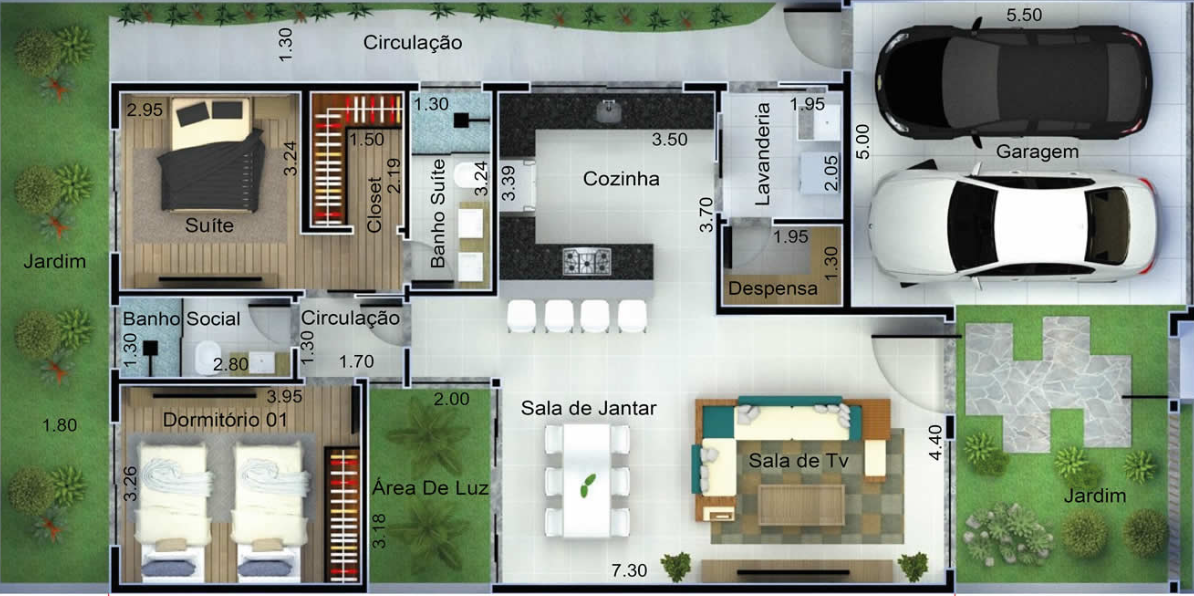

In [ ]:
novo_imovel = pd.DataFrame({
    'const': [1],
    'Número de Quartos': [3],
    'Número de Banheiros': [2],
})
print(modelo_3.predict(novo_imovel)[0])

755771.2023166695


Construção de um gráfico para comparar os resíduos com o previsto (treino)

residuos: Os resíduos, que são as diferenças entre os valores reais e os valores previstos pelo modelo.
Os valores quanto mais próximo do zero, mais assertivo é o modelo.

Analise do gráfico:

*   Os valores estão bem dispersos em relação ao zero;
*   Existe bastaste outliers o que prejudica a assertividade do modelo

Podemos concluir que com base no modelo previsto, o correto valor da casa difere do valor previsto numa margem de erro enorme, sendo que esse modelo não deve ser utilizado para precificação dos imoveis.





<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

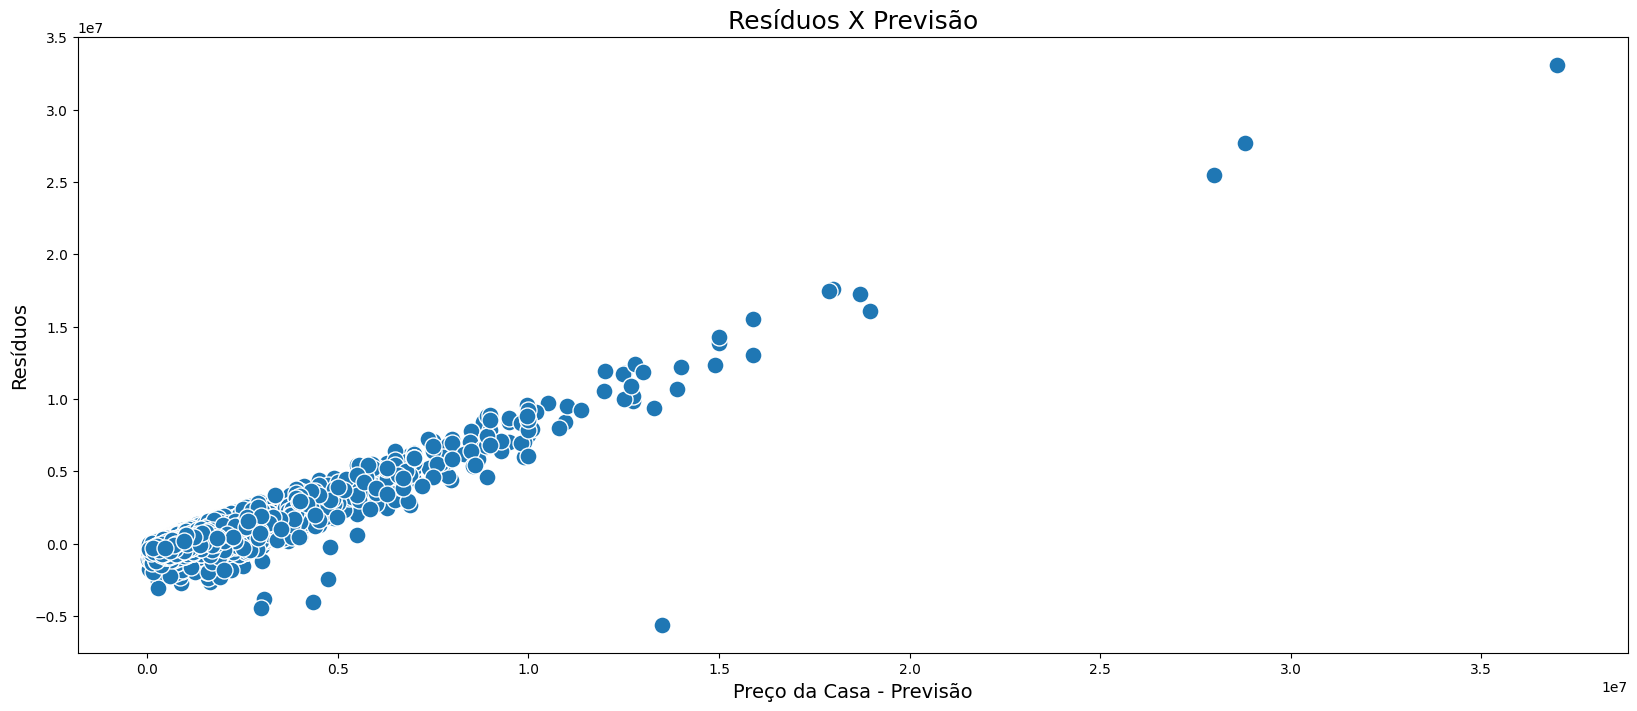

In [ ]:
residuos = modelo_3.resid
ax = sns.scatterplot(x= y_train, y= residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax